#### RANDOM FOREST CLASSIFIER

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl

In [2]:
data = pd.read_csv("../Datasets/data.csv")

data.head()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placed,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
0,38,47,13,53,35,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,60,70,60,50,40,33,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,58,73,33,67,30,60,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,36,33,40,33,45,33,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,60,60,55,65,40,73,11,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.shape

(1672, 25)

In [4]:
data.isna().sum()

Aptitude                                              0
English                                               0
Quantitative                                          0
Analytical                                            0
Domain                                                0
Computer Fundamental                                  0
Coding                                                0
Placed                                                0
Branch_Agricultural Engineering                       0
Branch_Applied Electronics and Instrumentation        0
Branch_Automobile Engineering                         0
Branch_Civil Engineering                              0
Branch_Computer Science Engineering                   0
Branch_Electrical Engineering                         0
Branch_Electrical and Electronics Engineering         0
Branch_Electronics and Communications Engineering     0
Branch_Electronics and Instrumentation Engineering    0
Branch_Information Technology                   

In [5]:
data.describe()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Placed,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,...,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,50.365431,55.522727,40.816388,54.755383,38.177033,39.109450,14.701555,0.458732,0.001794,0.031100,...,0.261364,0.007177,0.070574,0.005383,0.008373,0.103469,0.962321,0.020335,0.008971,0.008373
std,11.959230,16.143194,17.626530,16.236267,13.607158,14.890081,28.214321,0.498443,0.042333,0.173641,...,0.439509,0.084438,0.256189,0.073192,0.091149,0.304661,0.190477,0.141185,0.094319,0.091149
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,47.000000,27.000000,47.000000,30.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,51.000000,60.000000,40.000000,55.000000,35.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,58.000000,67.000000,53.000000,67.000000,45.000000,47.000000,20.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,84.000000,93.000000,100.000000,93.000000,85.000000,93.000000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = data.drop("Placed", axis=1)
y = data["Placed"]

In [7]:
X.head()

,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Branch_Agricultural Engineering,Branch_Applied Electronics and Instrumentation,Branch_Automobile Engineering,...,Branch_Electronics and Communications Engineering,Branch_Electronics and Instrumentation Engineering,Branch_Information Technology,Branch_Instrumentation and Control Engineering,Branch_MCA,Branch_Mechanical Engineering,Degree_B. Tech.,Degree_BE,Degree_M. Tech.,Degree_MCA
0,38,47,13,53,35,7,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,60,70,60,50,40,33,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,58,73,33,67,30,60,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,36,33,40,33,45,33,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,60,60,55,65,40,73,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Placed, dtype: int64

In [9]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
round(model.score(X_test, y_test)*100,2)

91.64

In [11]:
from sklearn.metrics import classification_report, roc_curve

In [14]:
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       191
           1       0.86      0.96      0.91       144

    accuracy                           0.92       335
   macro avg       0.91      0.92      0.92       335
weighted avg       0.92      0.92      0.92       335



In [16]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

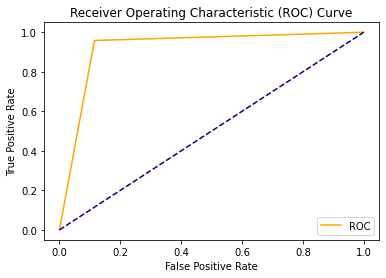

In [17]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
plot_roc_curve(fpr, tpr)

In [15]:
# saving the trained model
pkl.dump(model, open("../Models/rfc.pkl", "wb"))
print("Model saved successfully")

Model saved successfully
